# The IPYNB Goals:

1. To read in the Australian Weather Dataframe
2. Minimize the storage space of the dataframe
3. Visualize the Top 5 Locations with the Lowest Rainfall and Highest Rainfall in Australia

In [1]:
import pandas as pd
import numpy as np

from os.path import join

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

path='C:/Users/blake.gonthier/Desktop/Rain in Australia'

* Creating Pipeline Class to manage and run the pipeline:

In [2]:
class Pipeline:
    
    def __init__(self):
        self.tasks=[]
        
        
    def add_tasks(self,f):
        self.tasks.append(f)
        return 

    def run(self):
        
        counter=0
        
        for a in self.tasks:
            if counter==0:
                
                input_weather=a()
                counter=1
            else:
                input_weather=a(input_weather)
        
            
            
pipeline=Pipeline()
print(pipeline.tasks)


[]


* Function that reads in the necessary data:

In [3]:
def read_in_data():
    
    weather=pd.read_csv(join(path,'weatherAUS.csv'))
    
    return weather 

* Function that converts all object columns if needed if there are a small number of uniques for the column to save memory:

In [4]:
def categorize(weather):
    
    filt=weather.select_dtypes('object')
    
    init_mem=weather.memory_usage(deep=True).sum()/(2**20)
    
    for a in filt.columns:
        
        uniques=len(filt[a].unique())
        
        
        if uniques<20:
            print('Converting '+a)
            weather[a]=filt[a].astype('category')
            
    # Print Memory Saved
    
    fin_mem=weather.memory_usage(deep=True).sum()/(2**20)
    
    print()
    
    saved=round(init_mem-fin_mem,3)
    
    print('Total Memory Saved: '+str(saved)+' MB')
    
    print()
    
    return weather

* Function that downcasts the type of the numeric variables if the values that comprise the column can be converted without losing data to save memory:

In [5]:
def downcast_numeric(weather):
    
    nums=['integer','float']
    
    init_mem=weather.memory_usage(deep=True).sum()/(2**20)
    
    for num in nums:
        filt=weather.select_dtypes(num)
        
        for cols in filt.columns:
            print('Downcasting '+cols)
            weather[cols]=pd.to_numeric(weather[cols],downcast=num)
    
    fin_mem=weather.memory_usage(deep=True).sum()/(2**20)
    
    print()
    
    saved=round(init_mem-fin_mem,3)
    
    print('Total Memory Saved: '+str(saved)+' MB')
    
    print()
    
    return weather

* Function that can calculate the total memory of the dataframe and display it:

In [6]:
def calculate_memory(weather):
    print()
    fin_mem=round(weather.memory_usage(deep=True).sum()/(2**20),3)
    print('Approximate memory: '+str(fin_mem)+ ' MB')
    print()
    return 

* Aggregate function combining the memory saving functions:

In [7]:
def minimizing_storage(weather):
    
    weather=categorize(weather)
    
    weather=downcast_numeric(weather)
    
    
    return weather

* Function that groups the data by location, makes the aggregated rainfall data, and filters out the locations with the most and lest per year rainfall totals:

In [8]:
def group_by_location(weather):
    
    grouped=weather[['Rainfall','Location']].groupby('Location')
    
    grouped_count=grouped.count()['Rainfall']
    
    grouped_rainfall=grouped.sum()['Rainfall']
    
    grouped_year_average=grouped_rainfall/grouped_count*365
    
    highest=grouped_year_average.sort_values(ascending=False).iloc[:5]
    
    lowest=grouped_year_average.sort_values().iloc[:5]
    
    return lowest,highest

* Function that takes in the aggregated rainfall data and visualizes the data for the lowest and highest rainfall locations in Australia:

In [9]:
def visualize_rainfall(rainfall_tuple):
    
    lowest,highest=rainfall_tuple
    
    pos=np.arange(len(lowest))
    plt.figure(figsize=(10,7))
   
    
    plt.subplot(221)
    
    plt.bar(pos,lowest.values,tick_label=lowest.index,color='#FAD72A')
    
    plt.title('Lowest Rainfall per Year')
    
    plt.ylabel('Inches of Rainfall per Year')
        
    plt.xticks(rotation=30)
    
    plt.subplot(222)
    
    plt.bar(pos,highest.values,tick_label=highest.index)
    
        
    plt.title('Highest Rainfall per Year')
    

    
    plt.xticks(rotation=30)

* Initializing an instance of the Pipeline Class:

In [10]:
pipeline=Pipeline()

* Adding the Pipeline tasks in the correct order:

In [11]:
pipeline.add_tasks(read_in_data)
pipeline.add_tasks(minimizing_storage)
pipeline.add_tasks(group_by_location)
pipeline.add_tasks(visualize_rainfall)

* Displaying to see the queue and check if the tasks were added in the right order:

In [12]:
pipeline.tasks

[<function __main__.read_in_data()>,
 <function __main__.minimizing_storage(weather)>,
 <function __main__.group_by_location(weather)>,
 <function __main__.visualize_rainfall(rainfall_tuple)>]

* Running the Pipeline:

Converting WindGustDir
Converting WindDir9am
Converting WindDir3pm
Converting RainToday
Converting RainTomorrow

Total Memory Saved: 39.247 MB

Downcasting MinTemp
Downcasting MaxTemp
Downcasting Rainfall
Downcasting Evaporation
Downcasting Sunshine
Downcasting WindGustSpeed
Downcasting WindSpeed9am
Downcasting WindSpeed3pm
Downcasting Humidity9am
Downcasting Humidity3pm
Downcasting Pressure9am
Downcasting Pressure3pm
Downcasting Cloud9am
Downcasting Cloud3pm
Downcasting Temp9am
Downcasting Temp3pm
Downcasting RISK_MM

Total Memory Saved: 9.221 MB



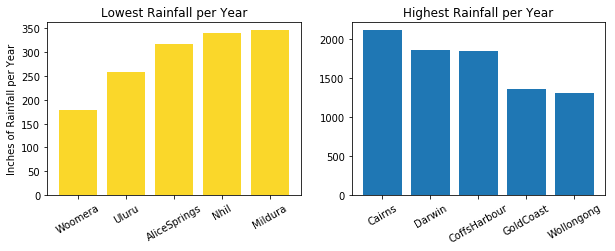

In [13]:
pipeline.run()

As you can see the area in Australia that Experienced the least rainfall on a yearly basis is Woomera and the the area in Australia that Experienced the most rainfall on a yearly basis is Cairns